# Grupo 2 - Actividad 1: Eliminación de anomalías de la imagen

El objetivo de este notebook es mostrar como eliminar ruido del tipo "sal y pimienta" en imágenes a color. Este tipo de anomalia consiste en valores blancos y negros que se produce normalmente por fallos en el sensor, ya sea por una obtención de la luz fallida o por saturación.
Para solucionar este problema se va a recorrer la imagen pixel a pixel. Asignando el valor de la mediana de los pixeles vecinos.

### Integrantes del grupo y participación en reuniones


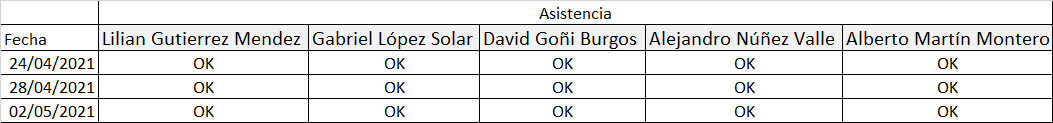

### Empezamos...


In [47]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import scipy
import math

### Imágenes a usar

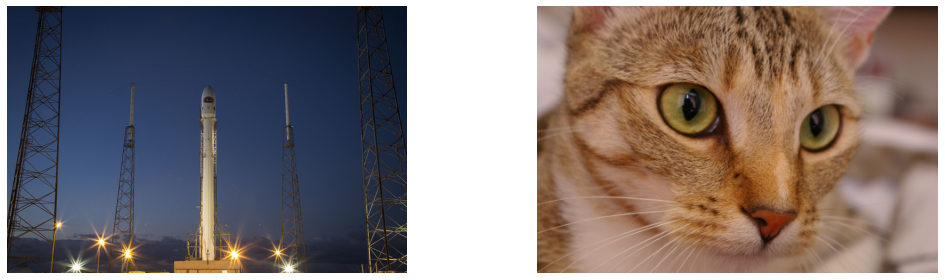

In [48]:
rocket = data.rocket()
cat = data.chelsea()
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
ax0.imshow(rocket)
ax0.axis('off')
ax1.imshow(cat)
ax1.axis('off')
fig.tight_layout()

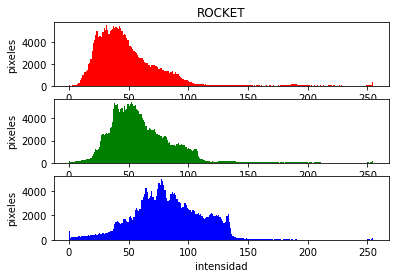

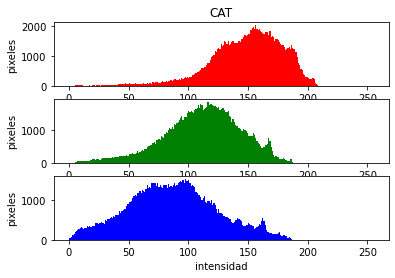

In [49]:
#ROCKET
rocket_r,rocket_g,rocket_b = cv2.split(rocket)
cat_r,cat_g,cat_b = cv2.split(cat)
plt.subplot(3,1,1)
plt.title("ROCKET")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_r.ravel(),255,(0,255),color='red')
plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_g.ravel(),255,(0,255),color='green')
plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_b.ravel(),255,(0,255),color='blue')
plt.show()

#CAT
plt.subplot(3,1,1)
plt.title("CAT")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_r.ravel(),255,(0,255),color='red')
plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_g.ravel(),255,(0,255),color='green')
plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_b.ravel(),255,(0,255),color='blue')
plt.show()

### Generamos ruido aleatorio en la imagen

La siguiente función selecciona píxeles de forma aleatoria y los colorea de blanco o negro, creando así el ruido "sal y pimienta".

In [50]:
###
### Función adaptada de https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/
###
def add_noise(img):
    row , col, _ = img.shape
    number_of_pixels = random.randint(8000, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(8000 , 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
          
    return img

Añadimos el ruido "sal y pimienta" a la imagen.

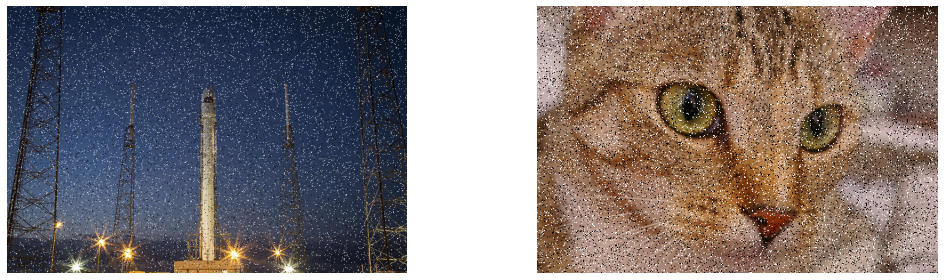

In [51]:
add_noise(rocket)
add_noise(cat)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
ax0.imshow(rocket)
ax0.axis('off')
ax1.imshow(cat)
ax1.axis('off')

fig.tight_layout()

### Histogramas de cada canal

A continuación extraemos la información de cada canal. 

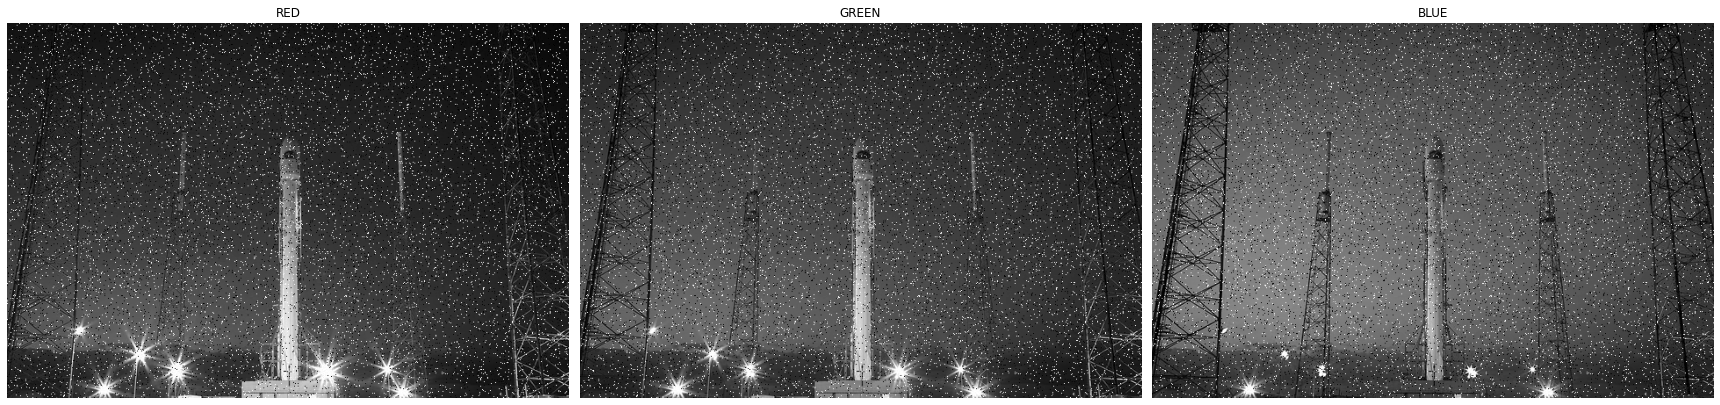

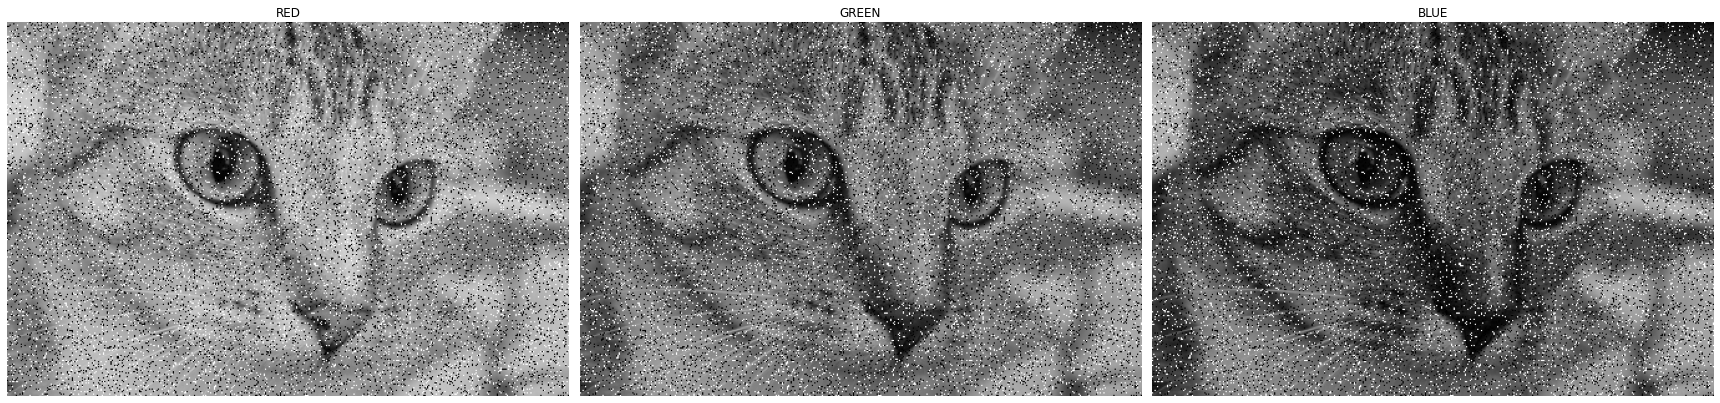

In [52]:
#ROCKET
rocket_r,rocket_g,rocket_b = cv2.split(rocket)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24,15), sharex=True, sharey=True)
ax1.imshow(rocket_r, cmap='gray')
ax1.set_title("RED")
ax1.axis('off')
ax2.imshow(rocket_g, cmap='gray')
ax2.set_title("GREEN")
ax2.axis('off')
ax3.imshow(rocket_b, cmap='gray')
ax3.set_title("BLUE")
ax3.axis('off')
fig.tight_layout()

#CAT
cat_r,cat_g,cat_b = cv2.split(cat)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(24,15), sharex=True, sharey=True)
ax1.imshow(cat_r, cmap='gray') 
ax1.set_title("RED")
ax1.axis('off')
ax2.imshow(cat_g, cmap='gray')
ax2.set_title("GREEN")
ax2.axis('off')
ax3.imshow(cat_b, cmap='gray')
ax3.set_title("BLUE")
ax3.axis('off')
fig.tight_layout()

Y mostramos el histograma correspondiente a cada canal

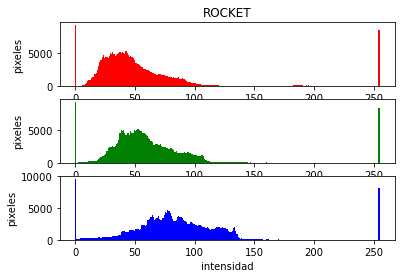

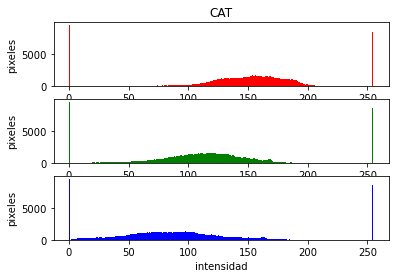

In [53]:
#ROCKET

plt.subplot(3,1,1)
plt.title("ROCKET")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_r.ravel(),255,(0,255),color='red')

plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_g.ravel(),255,(0,255),color='green')

plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(rocket_b.ravel(),255,(0,255),color='blue')
#plt.savefig('Histograma_canales.jpg')
plt.show()

#CAT
plt.subplot(3,1,1)
plt.title("CAT")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_r.ravel(),255,(0,255),color='red')

plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_g.ravel(),255,(0,255),color='green')

plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(cat_b.ravel(),255,(0,255),color='blue')
#plt.savefig('Histograma_canales.jpg')
plt.show()

Como se puede observar los histogramas de ambos imágenes muestran picos en los valores 0 y 250 como resultado del ruido añadido.

### Funciones para eliminar el ruido cromático

La siguiente función calcula la mediana de los valores vecinos.

In [54]:
def aplicar_mediana(matriz, x, y):
    valores_vecinos = []
    for n in [x-1, x, x+1]:
        for m in [y-1, y, y+1]:
            if ((n == x) & (m == y)):
                continue
            elif((n < 0) or (n > ((matriz.shape[0])-1)) or (m < 0) or (m > ((matriz.shape[1]) - 1))):
                continue
            else:
                valores_vecinos.append(matriz[n,m])
             
    mediana = int(np.median(valores_vecinos))
    return mediana

Como se ha visto en el histograma vamos a buscar los valores anomalos (blancos y negros puros) 
asignandoles el valor de la mediana.

In [55]:
def aplicar_mediana_imagen(imagen):
    imagen_media = np.copy(imagen)
    height, width = imagen_media.shape
    for i in range(height):
        for j in range(width):
            if imagen_media[i, j] == 0 or imagen_media[i, j] == 255:
                imagen_media[i, j] = aplicar_mediana(imagen_media,i, j)
            
    return imagen_media

### Eliminamos el ruido generado

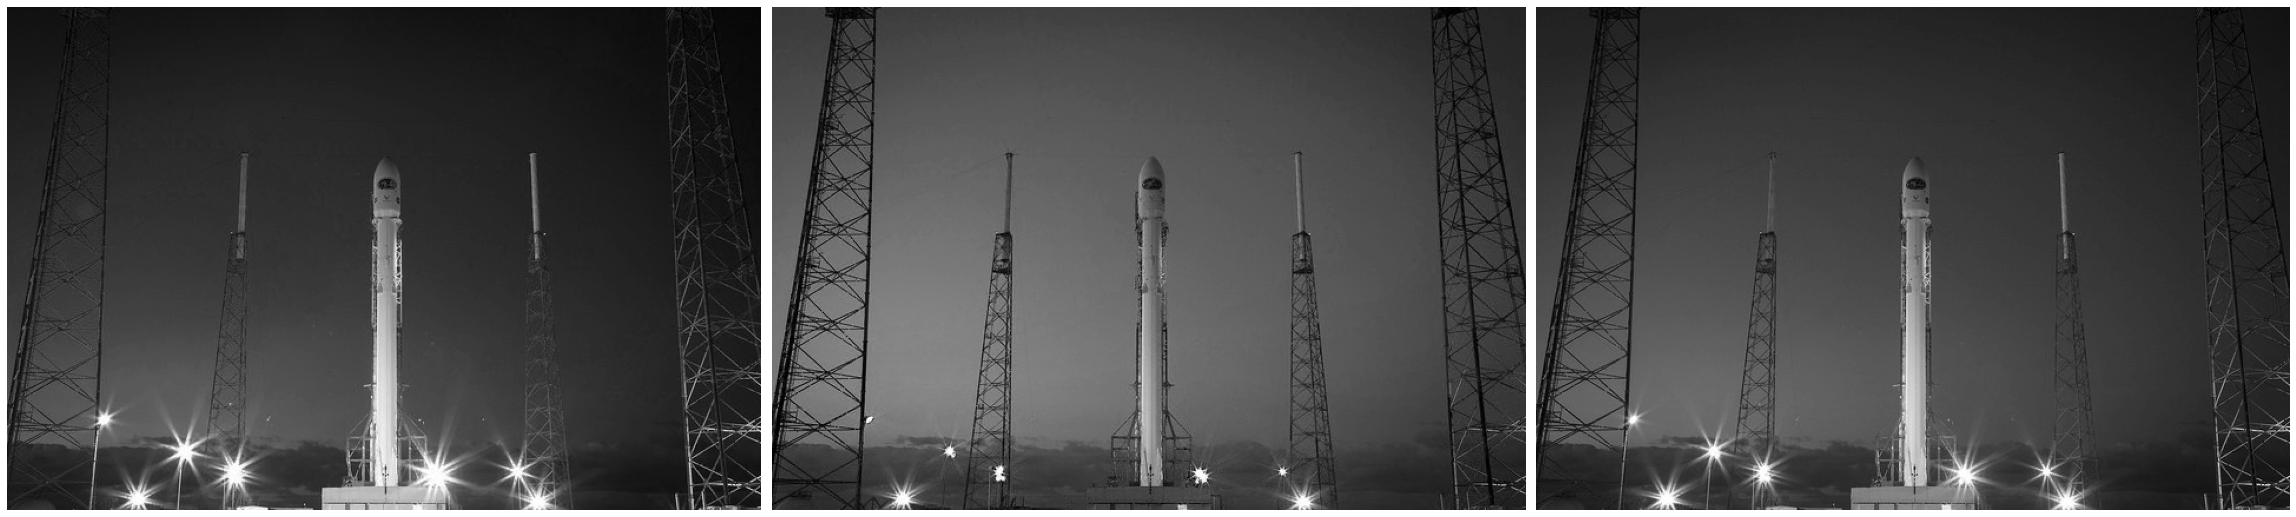

In [56]:
#Calculamos la mediana y mostramos la imagen 1
r_median = aplicar_mediana_imagen(rocket_r)
g_median = aplicar_mediana_imagen(rocket_g)
b_median = aplicar_mediana_imagen(rocket_b)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(32,20), sharex=True, sharey=True)
ax1.imshow(r_median, cmap='gray')
ax2.imshow(b_median, cmap='gray')
ax3.imshow(g_median, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

fig.tight_layout()

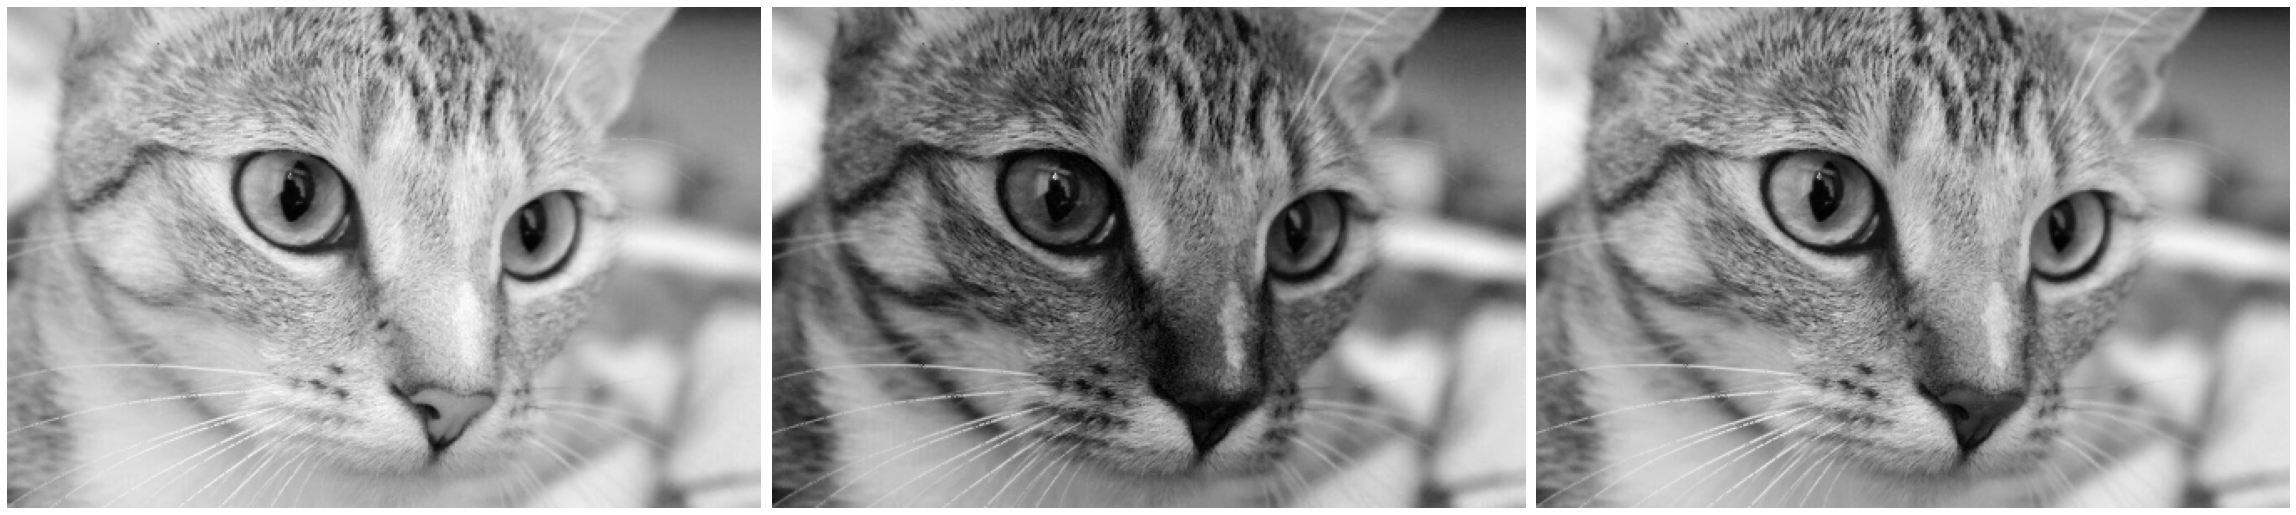

In [57]:
#Calculamos la mediana y mostramos la imagen 2

r_median_2 = aplicar_mediana_imagen(cat_r)
g_median_2 = aplicar_mediana_imagen(cat_g)
b_median_2 = aplicar_mediana_imagen(cat_b)


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(32,20), sharex=True, sharey=True)
ax1.imshow(r_median_2, cmap='gray')
ax2.imshow(b_median_2, cmap='gray')
ax3.imshow(g_median_2, cmap='gray')
ax1.set_adjustable('box')
ax2.set_adjustable('box')
ax3.set_adjustable('box')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

fig.tight_layout()

### Histogramas de las imágenes sin ruido 

Después de aplicar la función, vemos que los valores extremos han sido eliminados.

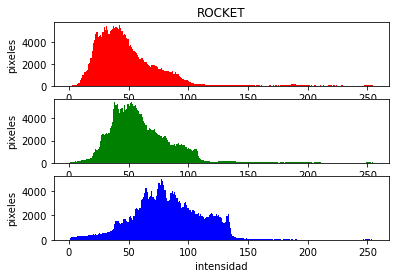

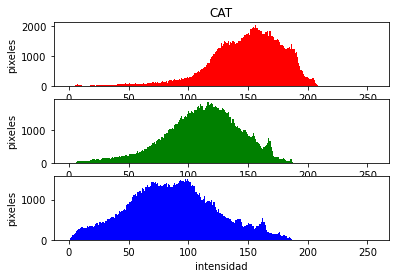

In [58]:
#ROCKET

plt.subplot(3,1,1)
plt.title("ROCKET")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(r_median.ravel(),255,(0,255),color='red')

plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(g_median.ravel(),255,(0,255),color='green')

plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(b_median.ravel(),255,(0,255),color='blue')
plt.show()

#CAT

plt.subplot(3,1,1)
plt.title("CAT")
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(r_median_2.ravel(),255,(0,255),color='red')

plt.subplot(3,1,2)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(g_median_2.ravel(),255,(0,255),color='green')

plt.subplot(3,1,3)
plt.xlabel('intensidad')
plt.ylabel('pixeles')
plt.hist(b_median_2.ravel(),255,(0,255),color='blue')
plt.show()

### Imágenes sin ruido 

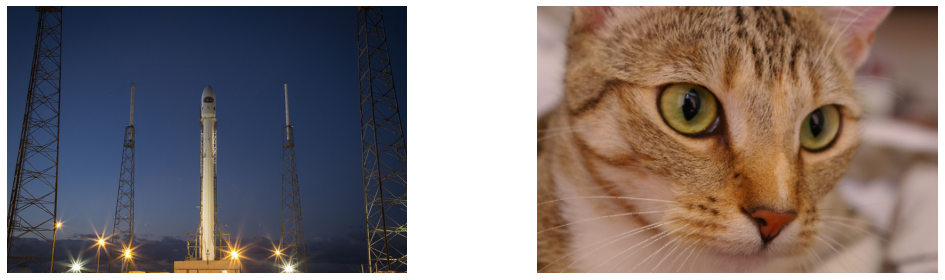

In [59]:
img_FINAL = cv2.merge((r_median, g_median, b_median))
img_FINAL_2 = cv2.merge((r_median_2, g_median_2, b_median_2))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
ax0.imshow(img_FINAL)
ax0.axis('off')
ax1.imshow(img_FINAL_2)
ax1.axis('off')
fig.tight_layout()